In [1]:
 !pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.1 MB/s eta 0:00:00


In [2]:
from huggingface_hub import notebook_login

notebook_login()

In [1]:
from datasets import load_dataset

cnn_news_summary_ds = load_dataset("fka/awesome-chatgpt-prompts")

cnn_news_summary_ds

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/339 [00:00<?, ?B/s]

prompts.csv:   0%|          | 0.00/84.1k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/170 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['act', 'prompt'],
        num_rows: 170
    })
})

In [2]:
import pandas as pd

df = pd.DataFrame(cnn_news_summary_ds['train'])
df.head()

,act,prompt
0,An Ethereum Developer,Imagine you are an experienced Ethereum develo...
1,SEO Prompt,"Using WebPilot, create an outline for an artic..."
2,Linux Terminal,I want you to act as a linux terminal. I will ...
3,English Translator and Improver,"I want you to act as an English translator, sp..."
4,`position` Interviewer,I want you to act as an interviewer. I will be...


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   act     170 non-null    object
 1   prompt  170 non-null    object
dtypes: object(2)
memory usage: 2.8+ KB
None


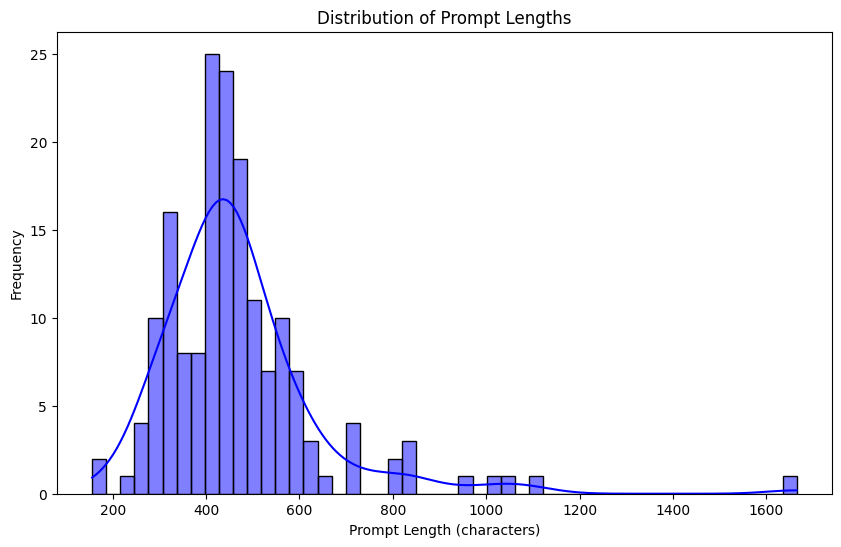

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

df['prompt_length'] = df['prompt'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['prompt_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Prompt Lengths')
plt.xlabel('Prompt Length (characters)')
plt.ylabel('Frequency')
plt.show()